In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
df=pd.read_csv('co2_emissions (1).csv',sep=';')
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [3]:
df

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [4]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [5]:
df.isna().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [7]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [8]:
df.fuel_type.value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: fuel_type, dtype: int64

In [9]:
df.vehicle_class.value_counts()

SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: vehicle_class, dtype: int64

In [10]:
df.transmission.value_counts()

AS    3127
A     1851
M     1185
AM     646
AV     576
Name: transmission, dtype: int64

In [11]:
df[df.duplicated()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M,X,7.9,5.9,7.0,40,163


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [14]:
df[df.duplicated()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions


In [15]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [16]:
df.drop(['make','model','vehicle_class'],axis=1,inplace=True)

In [17]:
df.corr()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
engine_size,1.000000,0.928796,0.834325,0.766700,0.820183,-0.764060,0.854999
cylinders,0.928796,1.000000,0.801180,0.717321,0.780932,-0.724347,0.834697
fuel_consumption_city,0.834325,0.801180,1.000000,0.950733,0.994040,-0.927901,0.918528
fuel_consumption_hwy,0.766700,0.717321,0.950733,1.000000,0.978578,-0.892238,0.883153
fuel_consumption_comb(l/100km),0.820183,0.780932,0.994040,0.978578,1.000000,-0.926110,0.916611
fuel_consumption_comb(mpg),-0.764060,-0.724347,-0.927901,-0.892238,-0.926110,1.000000,-0.906839
co2_emissions,0.854999,0.834697,0.918528,0.883153,0.916611,-0.906839,1.000000


<AxesSubplot:>

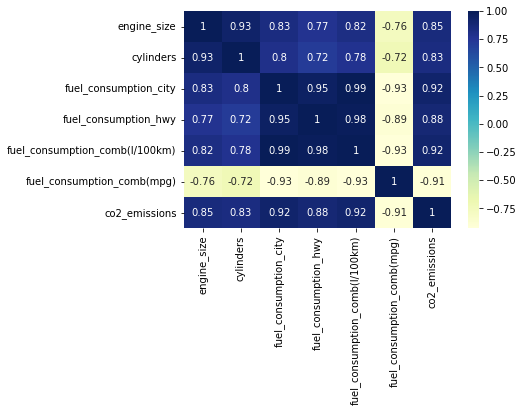

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

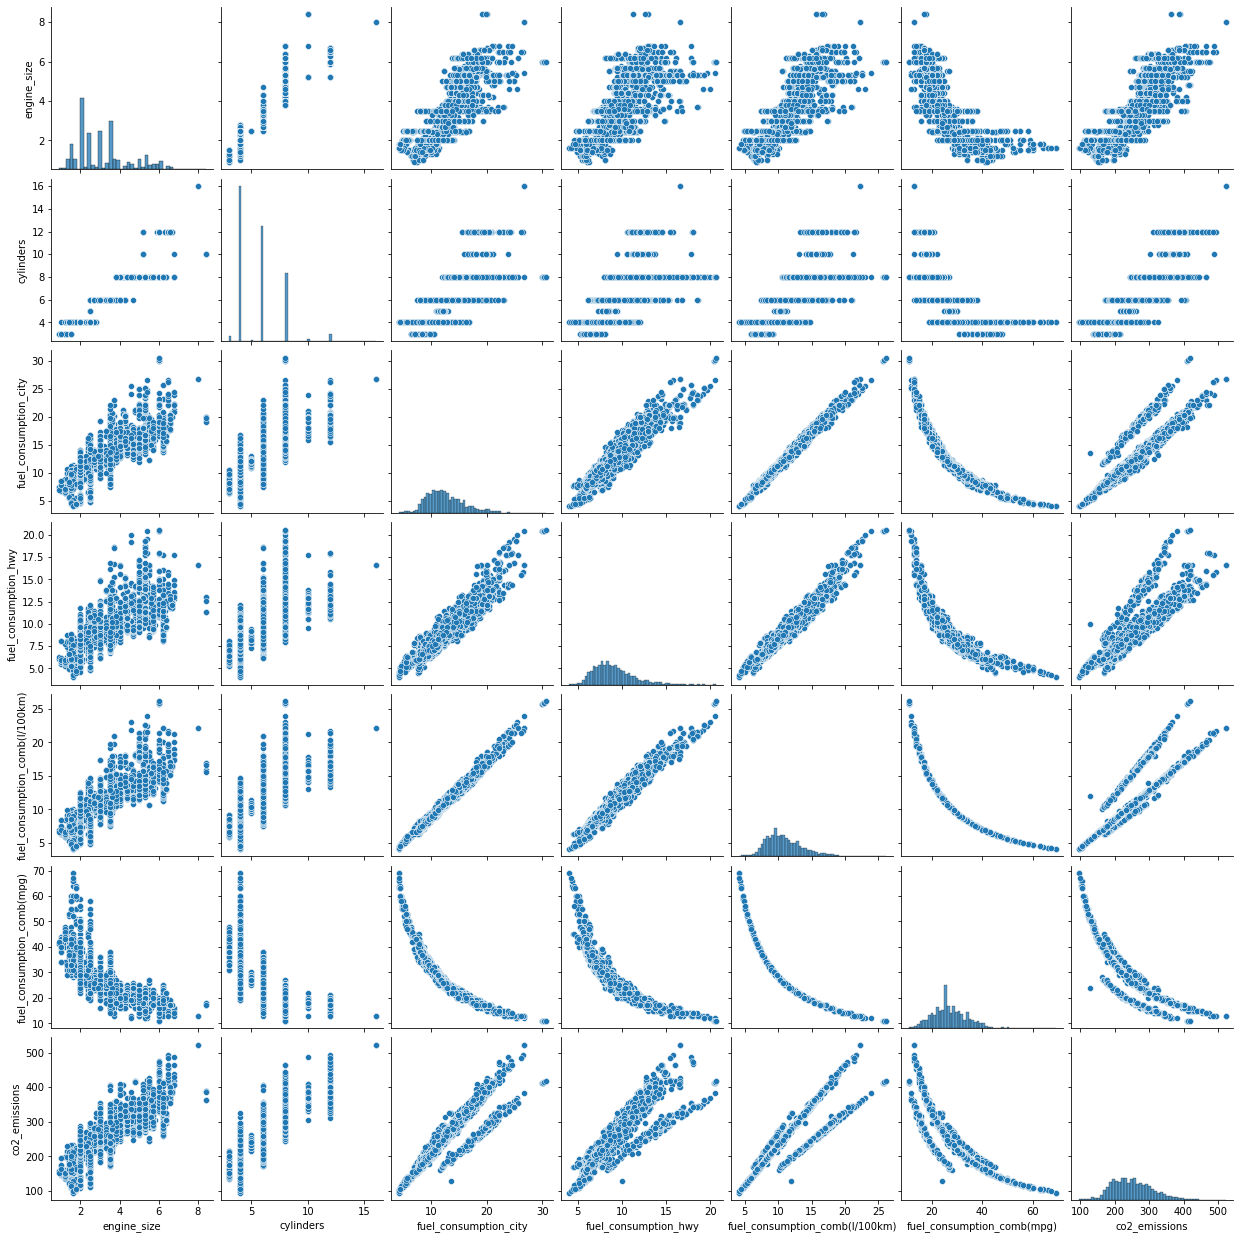

In [19]:
sns.pairplot(df)

In [20]:
df.columns

Index(['engine_size', 'cylinders', 'transmission', 'fuel_type',
       'fuel_consumption_city', 'fuel_consumption_hwy',
       'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)',
       'co2_emissions'],
      dtype='object')

In [21]:
x=df.drop('co2_emissions',axis=1)
y=df['co2_emissions']

In [22]:
x.head()

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg)
0,2.0,4,AS,Z,9.9,6.7,8.5,33
1,2.4,4,M,Z,11.2,7.7,9.6,29
2,1.5,4,AV,Z,6.0,5.8,5.9,48
3,3.5,6,AS,Z,12.7,9.1,11.1,25
4,3.5,6,AS,Z,12.1,8.7,10.6,27


In [23]:
x.transmission.value_counts()

AS    2720
A     1536
M     1019
AM     540
AV     458
Name: transmission, dtype: int64

In [24]:
x.fuel_type.value_counts()

X    3030
Z    2765
E     330
D     147
N       1
Name: fuel_type, dtype: int64

In [25]:
le=LabelEncoder()
x['transmission']=le.fit_transform(x['transmission'])
x['fuel_type']=le.fit_transform(x['fuel_type'])

In [26]:
x.transmission.value_counts()

2    2720
0    1536
4    1019
1     540
3     458
Name: transmission, dtype: int64

In [27]:
x.fuel_type.value_counts()

3    3030
4    2765
1     330
0     147
2       1
Name: fuel_type, dtype: int64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [29]:
scalar=MinMaxScaler()
s_x_train=scalar.fit_transform(x_train)
s_x_test=scalar.transform(x_test)

In [30]:
linear=LinearRegression()
model=linear.fit(s_x_train,y_train)

In [31]:
model.coef_

array([  46.55821759,   65.84764165,   -0.64757901,   31.68392211,
        -30.81003816,   61.15822097,  140.11267327, -155.67254737])

In [32]:
model.intercept_

189.4618073967075

In [33]:
train_pred=model.predict(s_x_train)

In [34]:
r2_score(train_pred,y_train)

0.9046549343335681

In [35]:
mean_absolute_error(y_train,train_pred)

11.398665387521943

In [36]:
test_pred=model.predict(s_x_test)

In [37]:
r2_score(y_test,test_pred)

0.9119642535214818

In [38]:
mean_absolute_error(y_test,test_pred)

10.939470652433302